In [11]:
using XLSX, DataFrames, TimeSeries
using StatsBase
using Plots, StatsPlots
using LinearAlgebra
using GLM
using FredData
include("../utils.jl")


print_percentiles (generic function with 2 methods)

In [12]:
columns = [:Date, :short_pl, :short_us, :short_ez, :cpi_pl, :cpi_us, :cpi_ez, :real_pln, :real_us, :real_ez, :term_pln, :term_us,	:term_ez, :real_pln_usa, :real_pln_ez,	:usdpln,	:eurpln,	:usdpln_ret,	:eurpln_ret, :real_usdpln, :real_eurpln, :real_usdpln_ret, :real_eurpln_ret]

23-element Vector{Symbol}:
 :Date
 :short_pl
 :short_us
 :short_ez
 :cpi_pl
 :cpi_us
 :cpi_ez
 :real_pln
 :real_us
 :real_ez
 ⋮
 :real_pln_ez
 :usdpln
 :eurpln
 :usdpln_ret
 :eurpln_ret
 :real_usdpln
 :real_eurpln
 :real_usdpln_ret
 :real_eurpln_ret

In [52]:
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Macro_Data_2001"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
data = TimeArray(data_df,timestamp=:Date) |> x -> from(x,Date(2003,01,01)) |> x -> to(x,Date(2021,12,30))

76×22 TimeArray{Float64, 2, Date, Matrix{Float64}} 2003-01-01 to 2021-10-01
┌────────────┬────────────┬────────────┬─────────────┬─────────────┬────────────
│            │ short_pl   │ short_us   │ short_ez    │ cpi_pl      │ cpi_us    ⋯
├────────────┼────────────┼────────────┼─────────────┼─────────────┼────────────
│ 2003-01-01 │     0.0624 │  0.0126333 │   0.0268307 │  0.00559352 │   0.01011 ⋯
│ 2003-04-01 │  0.0554333 │  0.0116667 │   0.0236191 │  0.00370831 │  0.003642 ⋯
│ 2003-07-01 │  0.0520667 │     0.0107 │   0.0213926 │ -0.00523402 │  0.004900 ⋯
│ 2003-10-01 │  0.0576333 │  0.0110333 │   0.0214965 │  0.00990396 │ 0.0001805 ⋯
│ 2004-01-01 │  0.0548333 │  0.0105333 │   0.0206295 │  0.00735526 │  0.009028 ⋯
│ 2004-04-01 │  0.0596667 │  0.0124667 │   0.0208243 │   0.0200792 │   0.01431 ⋯
│ 2004-07-01 │  0.0677333 │  0.0170333 │    0.021163 │    0.006263 │  0.003528 ⋯
│ 2004-10-01 │     0.0675 │     0.0225 │   0.0216361 │  0.00859507 │  0.005977 ⋯
│     ⋮      │     ⋮      │     ⋮

In [53]:
returns_summarystats(data,1)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
short_pl,0.0187,0.0677,0.0344,0.0495,0.0021,0.0038,0.0172,0.9518,-1.1442,1.84,0.0388
short_us,0.0164,0.0542,0.0149,0.0229,0.001,1.2148,0.0022,0.9657,0.3115,0.9111,0.0084
short_ez,0.0159,0.0498,0.0109,0.0213,-0.0057,0.9312,-0.0031,0.9648,-0.2082,0.6878,0.0051
cpi_pl,0.0074,0.0267,0.0059,0.0103,-0.0065,0.5578,0.0011,0.2152,-0.2688,0.8015,0.0048
cpi_us,0.0076,0.0234,0.0057,0.0106,-0.0283,-0.945,0.0023,0.1913,4.2292,0.7489,0.0052
cpi_ez,0.0069,0.0173,0.0042,0.0084,-0.0108,0.217,-0.001,-0.3552,-0.7379,0.6126,0.003
real_pln,0.0083,0.0182,0.0027,0.0089,-0.0219,-0.7677,-0.0013,0.3724,0.6686,0.3229,0.0031
real_us,0.0083,0.0357,-0.0019,0.0024,-0.0229,1.1641,-0.0059,0.2899,4.9967,-0.2296,-0.0021
real_ez,0.0074,0.0129,-0.0015,0.0042,-0.0186,-0.4291,-0.0064,-0.1799,-0.3131,-0.1984,-0.0005
term_pln,0.007,0.0212,0.0094,0.0148,-0.0063,-0.4746,0.0047,0.8089,-0.6757,1.3307,0.0105


In [54]:
returns_summarystats(log1p.(data),4)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
short_pl,0.0362,0.2622,0.1348,0.1933,0.0084,-0.0192,0.0683,0.9524,-1.1441,3.7239,0.1522
short_us,0.032,0.2113,0.0588,0.0905,0.004,1.1949,0.0089,0.9657,0.2592,1.8374,0.0335
short_ez,0.0312,0.1945,0.043,0.0844,-0.0227,0.9098,-0.0124,0.965,-0.2584,1.3774,0.0204
cpi_pl,0.0147,0.1053,0.0235,0.041,-0.0262,0.5423,0.0042,0.2153,-0.2914,1.6037,0.019
cpi_us,0.0151,0.0925,0.0225,0.0423,-0.1148,-1.0059,0.0091,0.1898,4.4719,1.4891,0.0209
cpi_ez,0.0137,0.0687,0.0167,0.0333,-0.0434,0.2045,-0.0041,-0.355,-0.7356,1.2218,0.0118
real_pln,0.0166,0.0721,0.0106,0.0354,-0.0885,-0.7935,-0.0051,0.3738,0.7203,0.6363,0.0124
real_us,0.0165,0.1403,-0.0078,0.0096,-0.0926,1.0953,-0.0239,0.2924,4.737,-0.4691,-0.0085
real_ez,0.0148,0.0512,-0.006,0.0169,-0.075,-0.4457,-0.0257,-0.1803,-0.2996,-0.4031,-0.0021
term_pln,0.014,0.0838,0.0372,0.0588,-0.0251,-0.4861,0.0187,0.8084,-0.6648,2.6625,0.0418


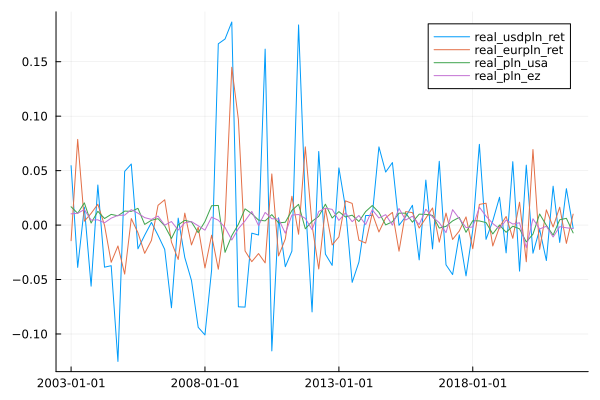

In [55]:
plot(data[[:real_usdpln_ret, :real_eurpln_ret, :real_pln_usa, :real_pln_ez]])

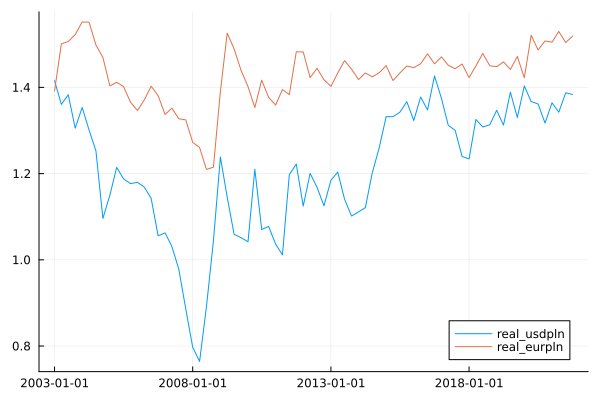

In [56]:
plot(data[[:real_usdpln, :real_eurpln]])

In [57]:
DataFrame(cor(values(data[:cpi_pl, :cpi_ez, :cpi_us])), [:pl, :ez, :us])

Row,pl,ez,us
,Float64,Float64,Float64
1,1.0,0.552739,0.444622
2,0.552739,1.0,0.540782
3,0.444622,0.540782,1.0


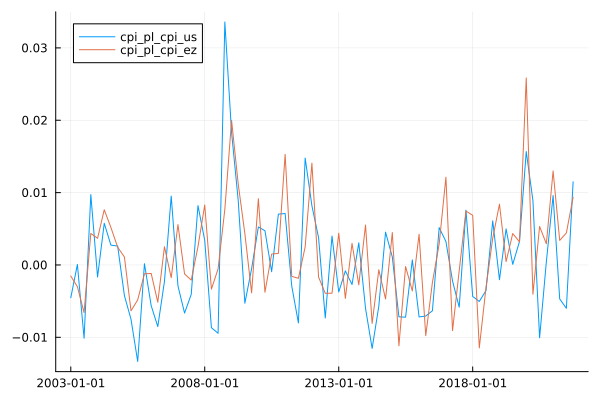

In [58]:
cpi_us_diff = data[:cpi_pl] .- data[:cpi_us]
cpi_ez_diff = data[:cpi_pl] .- data[:cpi_ez]
plot(cpi_us_diff)
plot!(cpi_ez_diff)

In [59]:
returns_summarystats(merge(cpi_us_diff, cpi_ez_diff),4)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
cpi_pl_cpi_us,0.0158,0.1343,0.001,0.0201,-0.0533,1.182,-0.023,0.1522,2.7473,0.0665,-0.0035
cpi_pl_cpi_ez,0.0135,0.1034,0.0068,0.0186,-0.0459,0.7891,-0.0121,0.0313,1.392,0.5055,0.0062
